# 数据标准化（Standardization）

**数据标准化**是将特征转换为均值为0、标准差为1的正态分布数据。适用于数据本身服从正态分布或需要在距离计算、梯度下降等过程中避免某些特征主导学习的场景。代表方法是**Z-score标准化**

## Z-score标准化

**Z-score标准化**基于原始数据的均值（mean）和标准差（standard deviation）进行数据的标准化。经过处理的数据符合标准正态分布，即均值为0，标准差为1。数学公式为：
$$z = \frac{x - \mu}{\sigma}$$
其中，
- $x$：原始数据 
- $\mu$：均值 
- $\sigma$：标准差 
- $z$：标准化后的值 

## StandardScaler()

### 输入参数

- `copy`: 是否复制数据
- `with_mean`: 是否将每个特征减去均值
- `with_std`: 是否将每个特征除以标准差

### 方法

| 方法                            | 作用                                    |
| ----------------------------- | ------------------------------------- |
| `fit(X)`                      | 计算训练数据 `X` 的均值和标准差（**不进行转换**）。        |
| `transform(X)`                | 使用已计算的均值和标准差对 `X` 进行标准化。              |
| `fit_transform(X)`            | 等同于 `fit(X)` 然后 `transform(X)`，一键完成。  |
| `inverse_transform(X_scaled)` | 将标准化后的数据恢复为原始数据。                      |
| `get_params()`                | 获取初始化参数（如 `with_mean`, `with_std` 等）。 |

## 泰坦尼克数据集

**titanic 数据集**包含了 891 条乘客记录，每条记录描述了乘客的个人信息及其在 Titanic 号上的生存情况
- survived：生存情况（0 = 未生还, 1 = 生还）
- pclass：乘客舱等级（1 = 一等舱, 2 = 二等舱, 3 = 三等舱）
- sex：乘客性别（male = 男性, female = 女性）
- age：乘客年龄（float，部分缺失值）
- sibsp：乘客在船上的兄弟姐妹或配偶数量（整数）
- parch：乘客在船上的父母或子女数量（整数）
- fare：乘客支付的票价（float）
- embarked：乘客登船港口（C = 瑟堡, Q = 皇后镇, S = 南安普敦）
- class：舱等级（文本版本的 pclass，First = 头等舱, Second = 二等舱, Third = 三等舱）
- who：乘客身份（man = 成年男性, woman = 成年女性, child = 儿童）
- adult_male：是否为成年男性（True = 是, False = 否）
- deck：乘客所在的甲板（A, B, C, D, E, F, G，部分缺失值较多）
- embark_town：乘客登船的城市（Cherbourg = 瑟堡, Queenstown = 皇后镇, Southampton = 南安普敦）
- alone：是否独自旅行（True = 独自旅行，False = 有亲属同行，对应 sibsp + parch == 0）

In [9]:
# 导入必要的库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                           classification_report, roc_curve, auc)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 代码实现

In [10]:
from sklearn.preprocessing import StandardScaler

# 初始化标准化器
std_scaler = StandardScaler()

# 标准化处理
standardized = std_scaler.fit_transform(df[['fare']])

# 转换为 DataFrame 便于查看
df_standardized = pd.DataFrame(standardized, columns=['fare_zscore'])

df_standardized

,fare_zscore
0,-0.502445
1,0.786845
2,-0.488854
3,0.420730
4,-0.486337
...,...
886,-0.386671
887,-0.044381
888,-0.176263
889,-0.044381


In [12]:
# 将标准化后的数据恢复为原始数据
std_scaler.inverse_transform(standardized)

array([[  7.25  ],
       [ 71.2833],
       [  7.925 ],
       [ 53.1   ],
       [  8.05  ],
       [  8.4583],
       [ 51.8625],
       [ 21.075 ],
       [ 11.1333],
       [ 30.0708],
       [ 16.7   ],
       [ 26.55  ],
       [  8.05  ],
       [ 31.275 ],
       [  7.8542],
       [ 16.    ],
       [ 29.125 ],
       [ 13.    ],
       [ 18.    ],
       [  7.225 ],
       [ 26.    ],
       [ 13.    ],
       [  8.0292],
       [ 35.5   ],
       [ 21.075 ],
       [ 31.3875],
       [  7.225 ],
       [263.    ],
       [  7.8792],
       [  7.8958],
       [ 27.7208],
       [146.5208],
       [  7.75  ],
       [ 10.5   ],
       [ 82.1708],
       [ 52.    ],
       [  7.2292],
       [  8.05  ],
       [ 18.    ],
       [ 11.2417],
       [  9.475 ],
       [ 21.    ],
       [  7.8958],
       [ 41.5792],
       [  7.8792],
       [  8.05  ],
       [ 15.5   ],
       [  7.75  ],
       [ 21.6792],
       [ 17.8   ],
       [ 39.6875],
       [  7.8   ],
       [ 76.

In [13]:
# 获取初始化参数
std_scaler.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

# 数据归一化（Normalization）

**数据归一化**是将特征缩放到一个固定范围（通常是$[0, 1]$或$[-1, 1]$），以避免特征之间量纲不同造成影响。代表方法是**最小-最大归一化（Min-Max Normalization）**

## 最小-最大归一化（Min-Max Normalization）

**最小-最大归一化**通过对原始数据进行线性变换，将数据映射到[0,1]区间内。数学公式为：
$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$
其中，
- $x$：原始值 
- $x_{min}, x_{max}$：该特征的最小值与最大值 

## MinMaxScaler()

### 输入参数

- `feature_range`: 目标缩放范围，默认值(0, 1)
- `copy`: 是否复制原始数据
- `clip`: 是否将超出范围的值裁剪到目标区间

### 方法

| 方法名                           | 功能                            |
| ----------------------------- | ----------------------------- |
| `fit(X)`                      | 计算 `X` 的最小值和最大值（不转换数据）        |
| `transform(X)`                | 将数据 `X` 缩放到指定区间（如 `[0, 1]`）   |
| `fit_transform(X)`            | 等同于先 `fit` 再 `transform`，一键完成 |
| `inverse_transform(X_scaled)` | 将归一化后的数据反向变换为原始数值             |
| `get_params()`                | 获取初始化参数（如 `feature_range`）    |

## 代码实现

In [14]:
from sklearn.preprocessing import MinMaxScaler

# 初始化归一化器
minmax_scaler = MinMaxScaler()

# 归一化处理
normalized = minmax_scaler.fit_transform(df[['fare']])

# 转换为 DataFrame 便于查看
df_normalized = pd.DataFrame(normalized, columns=['fare_minmax'])

df_normalized

,fare_minmax
0,0.014151
1,0.139136
2,0.015469
3,0.103644
4,0.015713
...,...
886,0.025374
887,0.058556
888,0.045771
889,0.058556


In [16]:
# 将归一化后的数据反向变换为原始数值
minmax_scaler.inverse_transform(normalized)

array([[  7.25  ],
       [ 71.2833],
       [  7.925 ],
       [ 53.1   ],
       [  8.05  ],
       [  8.4583],
       [ 51.8625],
       [ 21.075 ],
       [ 11.1333],
       [ 30.0708],
       [ 16.7   ],
       [ 26.55  ],
       [  8.05  ],
       [ 31.275 ],
       [  7.8542],
       [ 16.    ],
       [ 29.125 ],
       [ 13.    ],
       [ 18.    ],
       [  7.225 ],
       [ 26.    ],
       [ 13.    ],
       [  8.0292],
       [ 35.5   ],
       [ 21.075 ],
       [ 31.3875],
       [  7.225 ],
       [263.    ],
       [  7.8792],
       [  7.8958],
       [ 27.7208],
       [146.5208],
       [  7.75  ],
       [ 10.5   ],
       [ 82.1708],
       [ 52.    ],
       [  7.2292],
       [  8.05  ],
       [ 18.    ],
       [ 11.2417],
       [  9.475 ],
       [ 21.    ],
       [  7.8958],
       [ 41.5792],
       [  7.8792],
       [  8.05  ],
       [ 15.5   ],
       [  7.75  ],
       [ 21.6792],
       [ 17.8   ],
       [ 39.6875],
       [  7.8   ],
       [ 76.

In [17]:
# 获取初始化参数
minmax_scaler.get_params()

{'clip': False, 'copy': True, 'feature_range': (0, 1)}

# 总结

| 对比维度          | StandardScaler（标准化）                | MinMaxScaler（归一化）                |
|-------------------|----------------------------------------|---------------------------------------|
| **数学公式**      | (x - μ) / σ                            | (x - min) / (max - min)               |
| **输出范围**      | 无固定范围（均值=0，方差=1）           | 默认[0,1]（可自定义范围）             |
| **异常值敏感性**  | 不敏感                                 | 非常敏感                              |
| **数据分布要求**  | 适合近似正态分布                       | 对分布无特殊要求                      |
| **适用场景**      | • 异常值较多时<br>• 基于距离的算法<br>• 数据分布未知 | • 需要固定输入范围<br>• 无显著异常值<br>• 梯度下降类算法 |
| **优点**          | • 保留异常值信息<br>• 适用性广          | • 保持原始数据关系<br>• 固定输出范围  |
| **缺点**          | • 输出范围不固定<br>• 稀疏数据效果差    | • 受异常值影响大<br>• 可能破坏数据分布 |

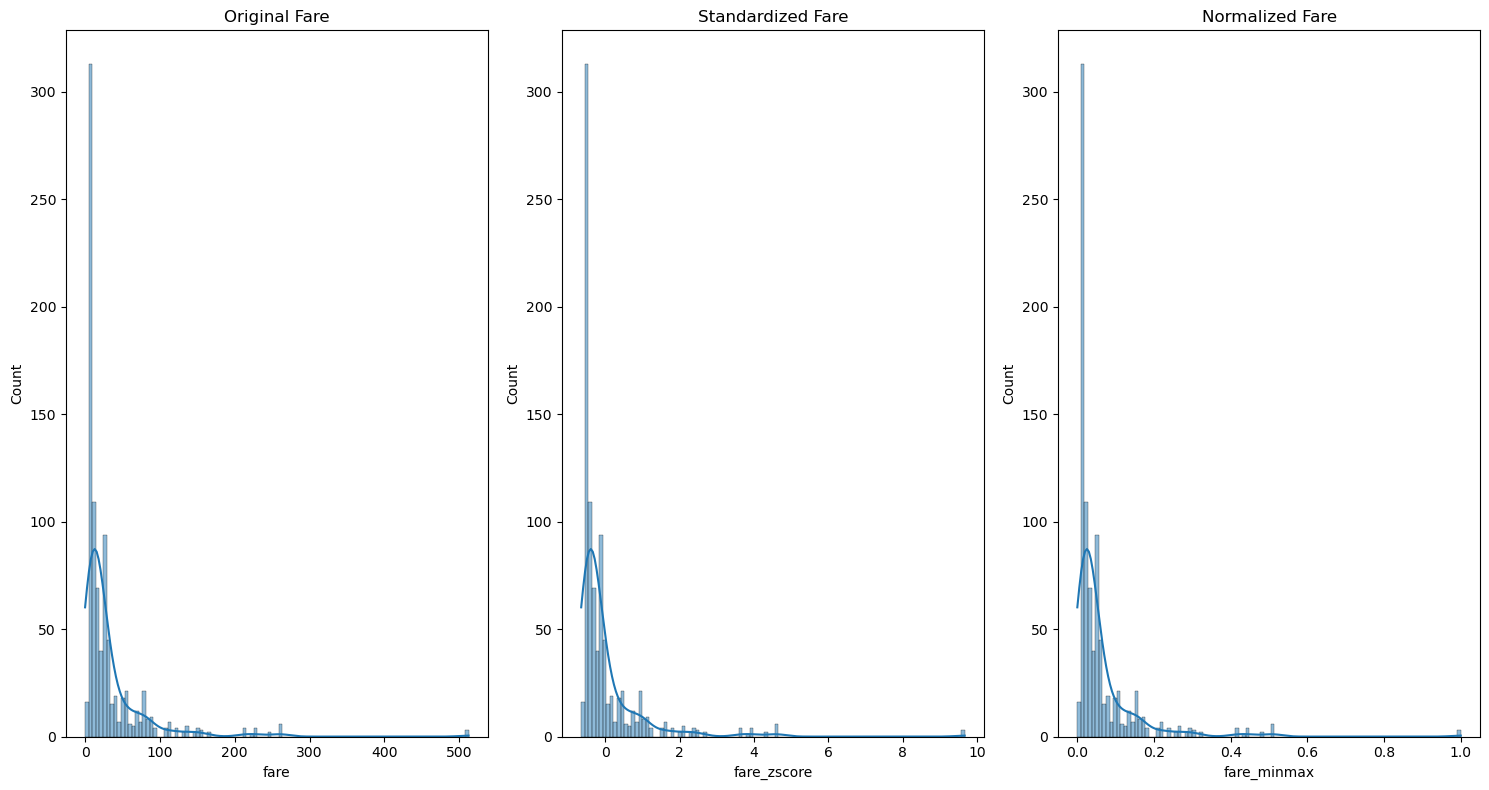

In [18]:
# 可视化对比分布
plt.figure(figsize=(15, 8))

# 原始数据分布
plt.subplot(1, 3, 1)
sns.histplot(df['fare'], kde=True)
plt.title('Original Fare')

# 标准化后分布
plt.subplot(1, 3, 2)
sns.histplot(df_standardized['fare_zscore'], kde=True)
plt.title('Standardized Fare')

# 归一化后分布
plt.subplot(1, 3, 3)
sns.histplot(df_normalized['fare_minmax'], kde=True)
plt.title('Normalized Fare')

plt.tight_layout()
plt.show()